# House price prediction | Bangalore city

Importing packages

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

print('imported')

imported


Read the dataset as Dataframe

In [2]:
df = pd.read_csv('blr_house_prices.csv')
df

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['area_type', 'availability', 'society'], axis='columns')

In [6]:
df1.shape

(13320, 6)

In [7]:
df1.head()

location       size total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00

### Data cleaning

Let's check how many null values are there in each column.

In [8]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

So, let's find the mean value for each column.

In [9]:
df1.mean()

bath         2.692610
balcony      1.584376
price      112.565627
dtype: float64

Let's fill the null values with the mean value of the column.

In [10]:
df1.fillna(df.mean(), inplace = True)

In [11]:
df1.head()

location       size total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00

Now, let's check how many null values are there.

In [12]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

Now let's drop the remaining null values and cleaning the data is now complete.

In [13]:
df2 = df1.dropna()
df2.shape

(13303, 6)

In [14]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

Thus, there are no Null values in the data.

Let's look at the Size column, which has string and integers.

In [15]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

There are different strings and we only need the integer values.

In [16]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-16-3fe4d2ba2b76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


By creating a new column named `BHK` with the values in `size` column. 

Then with the help of `lambda` function, the two values are splited and the value with index `0` is taken and also converted to `integer`.

In [17]:
df2.head()

location       size total_sqft  bath  balcony   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00    2

In [18]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df2[df2.BHK>15]

location        size total_sqft  bath   balcony  \
1718       2Electronic City Phase II      27 BHK       8000  27.0  0.000000   
3379                  1Hanuman Nagar      19 BHK       2000  16.0  1.584376   
3609   Koramangala Industrial Layout      16 BHK      10000  16.0  1.584376   
4684                     Munnekollal  43 Bedroom       2400  40.0  0.000000   
11559                  1Kasavanhalli  18 Bedroom       1200  18.0  1.584376   

       price  BHK  
1718   230.0   27  
3379   490.0   19  
3609   550.0   16  
4684   660.0   43  
11559  200.0   18

Now, let's look at the `total_sqft` column.

In [20]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There are certain values like `1133 - 1384`, let's look at the other values similar to this value.

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df2[~df2['total_sqft'].apply(is_float)].head()

location       size   total_sqft     bath   balcony    price  \
30            Yelahanka      4 BHK  2100 - 2850  4.00000  0.000000  186.000   
56          Devanahalli  4 Bedroom  3010 - 3410  2.69261  1.584376  192.000   
81          Hennur Road  4 Bedroom  2957 - 3450  2.69261  1.584376  224.500   
122              Hebbal      4 BHK  3067 - 8156  4.00000  0.000000  477.000   
137  8th Phase JP Nagar      2 BHK  1042 - 1105  2.00000  0.000000   54.005   

     BHK  
30     4  
56     4  
81     4  
122    4  
137    2

Let's take the average values of the ranges.

In [23]:
def sqft_avg(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
sqft_avg('2112')

2112.0

In [25]:
sqft_avg('3010 - 3410')

3210.0

Now, let's store it in the dataframe.

In [26]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(sqft_avg)
df3.head()

location       size  total_sqft  bath  balcony   price  BHK
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00    2

In [27]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
balcony               0
price               186
BHK                   4
Name: 30, dtype: object

### Feature Engineering

Now the `total_sqft` column is cleaned.

Let's create a new column `price_per_sqft` and insert the values by dividing `price` with `total_sqft`

In [28]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

location       size  total_sqft  bath  balcony   price  \
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00   

   BHK  price_per_sqft  
0    2     3699.810606  
1    4     4615.384615  
2    3     4305.555556  
3    3     6245.890861  
4    2     4250.000000

Let's get the unique number of locations.

In [29]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [30]:
len(df4['location'].unique())

1304

Let's get the total number of rows in each unique location.

In [31]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

There are certain rows with 1 value location, so let's make the location less than 10 as other location.

In [32]:
len(location_stats[location_stats<=10])

1052

There are totally `1052` location with less than 10.

In [33]:
loc_stat_less_than_10 = location_stats[location_stats<=10]
loc_stat_less_than_10

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

Let's count, how many unique values are in location.

In [34]:
len(df4['location'].unique())

1293

There are `1293` unique values in location column. 

Let's assign those 1052 location as other.

In [35]:
df4.location = df4.location.apply(lambda x: 'other' if x in loc_stat_less_than_10 else x)
len(df4['location'].unique())

242

After classifing the location with less than 10 as other, now there are only 242 unique locations.

In [36]:
df4.head(15)

location       size  total_sqft  bath   balcony   price  \
0   Electronic City Phase II      2 BHK      1056.0   2.0  1.000000   39.07   
1           Chikka Tirupathi  4 Bedroom      2600.0   5.0  3.000000  120.00   
2                Uttarahalli      3 BHK      1440.0   2.0  3.000000   62.00   
3         Lingadheeranahalli      3 BHK      1521.0   3.0  1.000000   95.00   
4                   Kothanur      2 BHK      1200.0   2.0  1.000000   51.00   
5                 Whitefield      2 BHK      1170.0   2.0  1.000000   38.00   
6           Old Airport Road      4 BHK      2732.0   4.0  1.584376  204.00   
7               Rajaji Nagar      4 BHK      3300.0   4.0  1.584376  600.00   
8               Marathahalli      3 BHK      1310.0   3.0  1.000000   63.25   
9                      other  6 Bedroom      1020.0   6.0  1.584376  370.00   
10                Whitefield      3 BHK      1800.0   2.0  2.000000   70.00   
11                Whitefield  4 Bedroom      2785.0   5.0  3.000000  295.00   
12        7th Phase JP Nagar      2 BHK      1000.0   2.0  1.000000   38.00   
13                 Gottigere      2 BHK      1100.0   2.0  2.000000   40.00   
14                  Sarjapur  3 Bedroom      2250.0   3.0  2.000000  148.00   

    BHK  price_per_sqft  
0     2     3699.810606  
1     4     4615.384615  
2     3     4305.555556  
3     3     6245.890861  
4     2     4250.000000  
5     2     3247.863248  
6     4     7467.057101  
7     4    18181.818182  
8     3     4828.244275  
9     6    36274.509804  
10    3     3888.888889  
11    4    10592.459605  
12    2     3800.000000  
13    2     3636.363636  
14    3     6577.777778

### Outlier removal

There are certain rows where BHK and Square feet does not match. So let's find those rows and remove.

In [37]:
df4[df4.total_sqft/df4.BHK<300].head()

location       size  total_sqft  bath   balcony  price  BHK  \
9                 other  6 Bedroom      1020.0   6.0  1.584376  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  1.584376  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  1.000000  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0  0.000000   85.0    8   
70                other  3 Bedroom       500.0   3.0  2.000000  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [38]:
df4.shape

(13303, 8)

In [39]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12559, 8)

In [40]:
 df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [42]:
df6 = remove_outliers(df5)
df6.shape

(10286, 8)

In [43]:
def scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(15, 8))
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'red', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'blue', label = '3 BHK', s = 50)
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

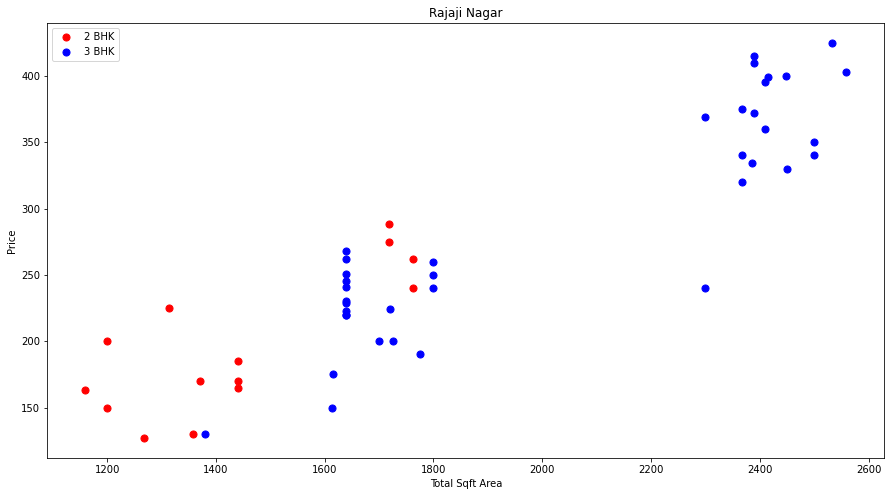

In [44]:
scatter_plot(df6, 'Rajaji Nagar')

We should remove some properties of certain location, the price of 3BHk is less than 2BHK, we should remove these rows.

We should also remove those 2BHK whose price_per_sqft is less than the price_per_sqft of 1BHK.

In [45]:
def remove_bhk_values(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [46]:
df7 = remove_bhk_values(df6)
df7.shape

(7353, 8)

Let's again plot the same scatter plot, and will check the changes are occured.

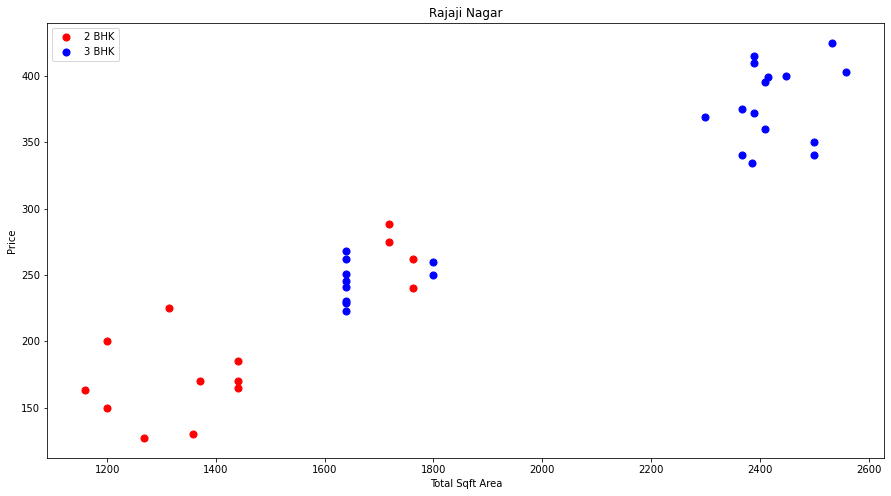

In [47]:
scatter_plot(df7, 'Rajaji Nagar')

From the above figure, it clearly shows that the rows where the price of 2BHK higher than 3BHK are removed.

Text(0, 0.5, 'Count')

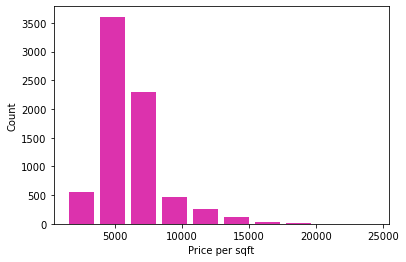

In [48]:
# plt.figure(figsize=[10,8])
plt.hist(df7.price_per_sqft,  color='#dc32ad', rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

Let's explore the column `Bathroom`

In [49]:
df7['bath'].unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

In [50]:
df7[df7.bath>10]

location    size  total_sqft  bath   balcony  price  BHK  \
5306  Neeladri Nagar  10 BHK      4000.0  12.0  1.584376  160.0   10   
8530           other  10 BHK     12000.0  12.0  1.584376  525.0   10   
8619           other  16 BHK     10000.0  16.0  1.584376  550.0   16   
9352           other  11 BHK      6000.0  12.0  1.584376  150.0   11   
9683           other  13 BHK      5425.0  13.0  0.000000  275.0   13   

      price_per_sqft  
5306     4000.000000  
8530     4375.000000  
8619     5500.000000  
9352     2500.000000  
9683     5069.124424

Text(0, 0.5, 'Count')

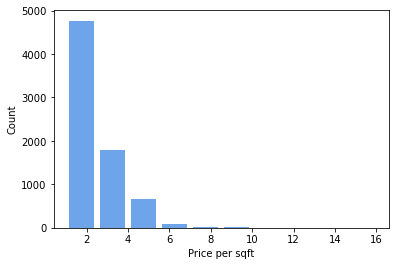

In [51]:
# plt.figure(figsize=[10,8])
plt.hist(df7.bath,  color='#6ea4ea', rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [52]:
df7[df7.bath>df7.BHK+2]

location       size  total_sqft  bath   balcony   price  BHK  \
1634  Chikkabanavar  4 Bedroom      2460.0   7.0  2.000000    80.0    4   
5267     Nagasandra  4 Bedroom      7000.0   8.0  1.584376   450.0    4   
6748    Thanisandra      3 BHK      1806.0   6.0  2.000000   116.0    3   
8455          other      6 BHK     11338.0   9.0  1.000000  1000.0    6   

      price_per_sqft  
1634     3252.032520  
5267     6428.571429  
6748     6423.034330  
8455     8819.897689

In [53]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7275, 8)

In [54]:
df8.head()

location   size  total_sqft  bath  balcony  price  BHK  \
0  1st Block Jayanagar  4 BHK      2850.0   4.0      1.0  428.0    4   
1  1st Block Jayanagar  3 BHK      1630.0   3.0      2.0  194.0    3   
2  1st Block Jayanagar  3 BHK      1875.0   2.0      3.0  235.0    3   
3  1st Block Jayanagar  3 BHK      1200.0   2.0      0.0  130.0    3   
4  1st Block Jayanagar  2 BHK      1235.0   2.0      2.0  148.0    2   

   price_per_sqft  
0    15017.543860  
1    11901.840491  
2    12533.333333  
3    10833.333333  
4    11983.805668

So, now the BHK and bathroom column are cleaned and some rows are dropped.

Now, let's drop the columns which are not needed for the modelling.

In [60]:
df9 = df8.drop(['size', 'price_per_sqft', 'balcony'], axis='columns')
df9.head()

location  total_sqft  bath  price  BHK
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

### One Hot encoding

Let's provide one hot encoding on location column and get dummy data.

In [62]:
dummies = pd.get_dummies(df9.location)
dummies.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 242 columns]

Let's merge the two dataframe.

In [63]:
df10 = pd.concat([df9, dummies.drop('other', axis = 'columns')], axis='columns')
df10.head()

location  total_sqft  bath  price  BHK  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

Since, we don't need the location column, we will drop the column.

In [64]:
df11 = df10.drop('location', axis='columns')
df11.head()

total_sqft  bath  price  BHK  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4      1235.0   2.0  148.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [65]:
df11.shape

(7275, 245)

Let's assign our dependent and independent variables.

In [66]:
x = df11.drop('price', axis='columns')
x.head()

total_sqft  bath  BHK  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   
3      1200.0   2.0    3                    1                   0   
4      1235.0   2.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 244 columns]

In [68]:
y = df11.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10277     70.0
10278    200.0
10281    110.0
10282     26.0
10285    400.0
Name: price, Length: 7275, dtype: float64

In [71]:
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [72]:
# from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8298945481067084

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.80692601, 0.7722475 , 0.86465798, 0.83532091, 0.8180139 ])

There are many types of Regression and let's find the suitable model using GridSearchCV 

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algorithm = {
        'linear_regression': {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha':[1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo, config in algorithm.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({'model':algo, 'best_score':gs.best_score_, 'best_params': gs.best_params_})
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x,y)

model  best_score                               best_params
0  linear_regression    0.819433                      {'normalize': False}
1              lasso    0.679903       {'alpha': 1, 'selection': 'cyclic'}
2      decision_tree    0.694794  {'criterion': 'mse', 'splitter': 'best'}

From the above table, Linear regression has the best score.

In [84]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

Let's predict the price of the properties.

In [88]:
def price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    y = np.zeros(len(x.columns))
    y[0] = sqft
    y[1] = bath
    y[2] = bhk
    if loc_index >= 0:
        y[loc_index] = 1
    return lr.predict([y])[0]

In [94]:
price('1st Phase JP Nagar', 1000, 2, 2)

83.50792706959314

In [93]:
price('1st Phase JP Nagar', 1000, 2, 3)

81.57520895368904

In [91]:
price('Indira Nagar', 1000, 2, 2)

186.03087080172685

In [92]:
price('Indira Nagar', 1000, 3, 3)

189.47914747223558

Thus, we get the required price, We will export this model to use it in Flask using pickle library.

In [96]:
import pickle
with open('price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr, f) 

Let's get the columns in json format.

In [97]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))